<h1><center><font size=9>Titanic Survival Prediction</center></font></h1>                        

![Alt text](https://glamadelaide.com.au/wp-content/uploads/2023/10/titanic-1.jpg)



<br/>
<font color = "brown" size = 5>Objective</font>

The objective of the Titanic dataset is to construct a predictive model determining whether a passenger survived the
Titanic disaster based on features such as age, gender, ticket class, fare, cabin, etc., providing insights into survival 
patterns among passengers.


<br/>
<font color = "brown" size = 5>About the dataset</font>

* There are 1309 records and 12 attributes which are splitted in train and test set. Training set includes 819 records and 418 records are in Test Set.
* The Survived column is Target Column.

<br/>
<font color = "brown" size = 5>Data Disription</font>
*  Survived : 0 = No, 1 = Yes

* pclass : Ticket class ie, 1 = 1st Class ( Upper ), 2 = 2nd Class ( Middle ), 3 = 3rd Class ( Lower )

* sex : Sex (Gender)

* Age : Age in years

*  sibsp : The dataset defines family relations ( siblings / spouses aboard the Titanic ) ie, Sibling = brother, sister, stepbrother, stepsister & Spouse = husband, wife (mistresses and fiancés were ignored)

* parch : The dataset defines family relations ( parents / children aboard the Titanic ) ie, Parent = mother, father & Child = daughter, son, stepdaughter, stepson

* ticket : Ticket number

* fare : Passenger fare

* cabin : Cabin number

* embarked : Port of Embarkation ie, C = Cherbourg, Q = Queenstown, S = Southampton

In [117]:
#importing libraries i needed!!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report



from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

In [118]:
#Read data
titanic=pd.read_csv("C:\\Users\\ADMIN\\Downloads\\Titanic\\tested.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [119]:
#Making copy of original dataset
df = titanic.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [120]:
#checking the shape of data
df.shape

(418, 12)

In [121]:
#Number of all records
df.size

5016

In [122]:
## columns shows all columns in dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [123]:
# info() function gives datatypes of dataframe variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [124]:
#First Five Rows Disply
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
#Last Five Rows Disply
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [126]:
# isnull() functions is used to finds null values.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [127]:
# Assuming 'df' is your DataFrame
nan_check = df.isna().any()
# or
nan_check = df.isnull().any()

print(nan_check)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [128]:
# Select the columns with missing values
columns_with_missing_values = ['Age', 'Fare']

# Create an imputer with a strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the selected columns
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

* We have many missing values, we try to fill missing vaues in Data-preprocessing step

In [129]:
##describe() shows statistical view of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.50000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.00000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.00000,3.00,3.0000
Age,418.0,30.272590,12.634534,0.17,23.0000,30.27259,35.75,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.00000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.00000,0.00,9.0000
Fare,418.0,35.627188,55.840500,0.00,7.8958,14.45420,31.50,512.3292


* The attributes "Age, SibSp, Parch, Fare" has large difference in their 75% and maximum value, which indicates the presence of outliers in the dataset.
* The attribute Fare has large difference in thier mean and median value.

* Observation :Thus, the observation suggest that there are extreme values i.e Outliers in our dataset.

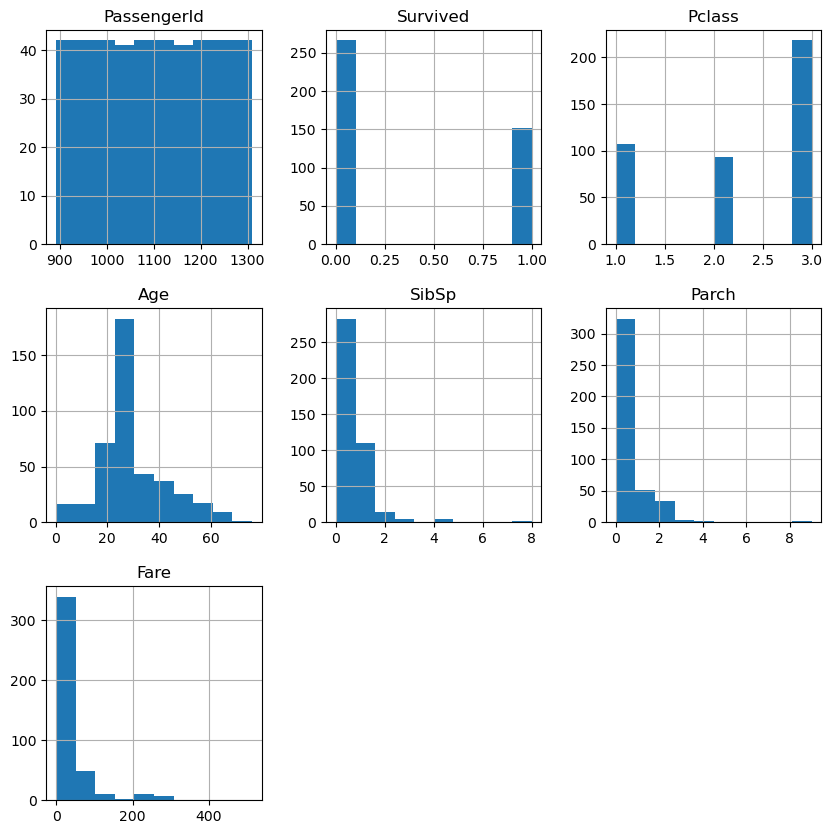

In [130]:
df.hist(figsize=(10,10));

* Observation
* Age attribute seems to be normally distributed.

* Fare, Parch, SibSp are positevely skewed ie shifted towards left.

* Pclass attributes is label encoded having values range 1 to 3, and 3 has most number of observations

* Survived attribute is binary categocial (Target variable), in which 0 has most number of observation, ie most of the people died

* PassengerID is irrelevent column

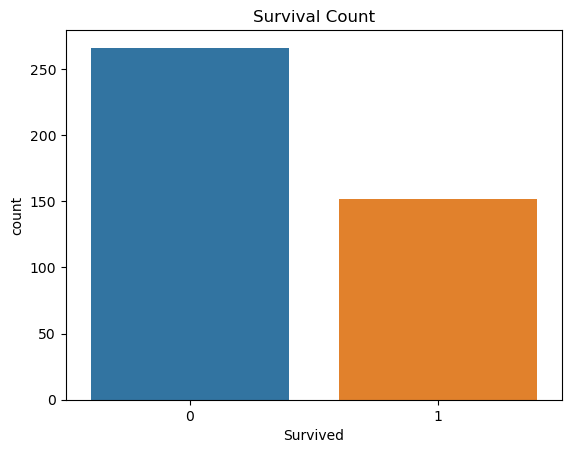

In [131]:
# Visualization 1: Countplot for Survival
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

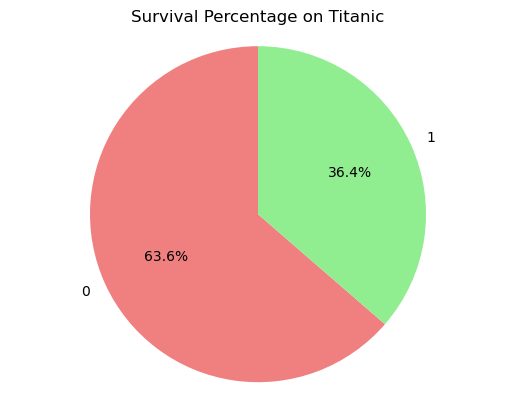

In [132]:
# Calculate survival percentages
survival_counts = df['Survived'].value_counts()
survival_percentages = survival_counts / len(df) * 100

# Plotting the pie chart
plt.pie(survival_percentages, labels=survival_percentages.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Survival Percentage on Titanic')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

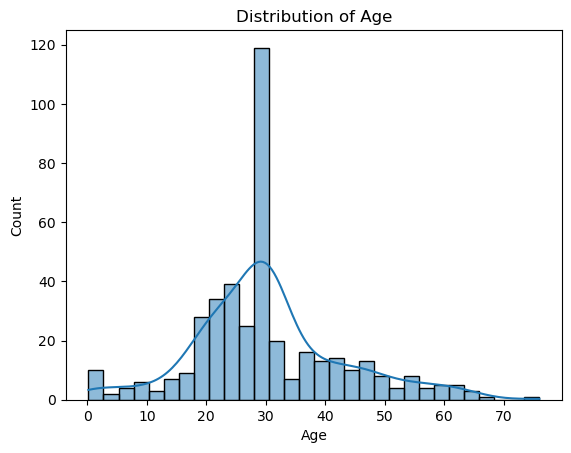

In [133]:
# Visualization 3: Distribution of Age
sns.histplot(df["Age"].dropna(), bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

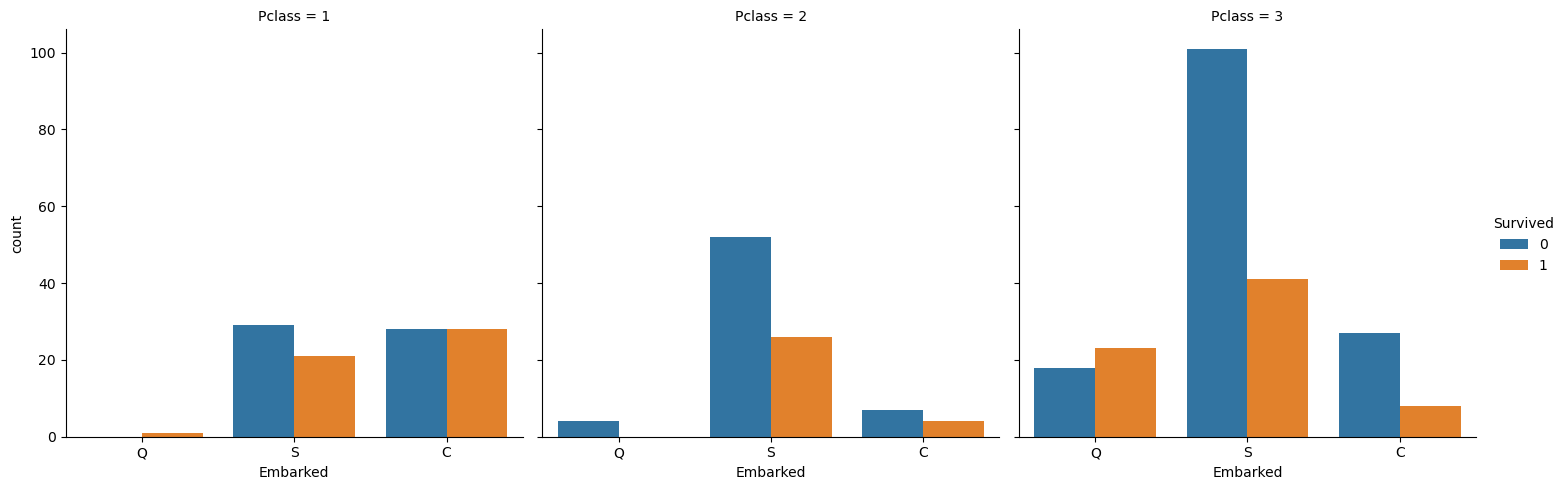

In [134]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = df) 

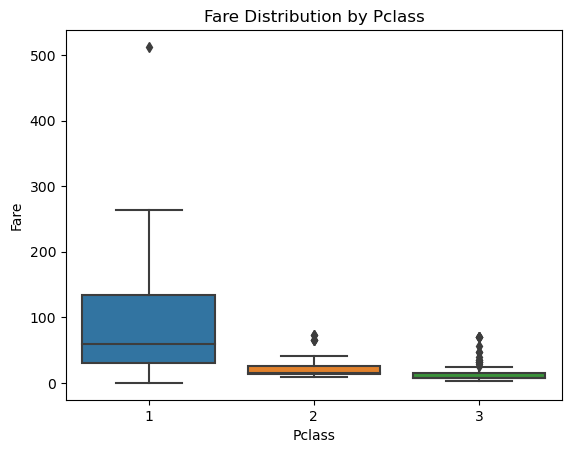

In [135]:
# Visualization 4: Boxplot for Fare by Pclass
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.title("Fare Distribution by Pclass")
plt.show()

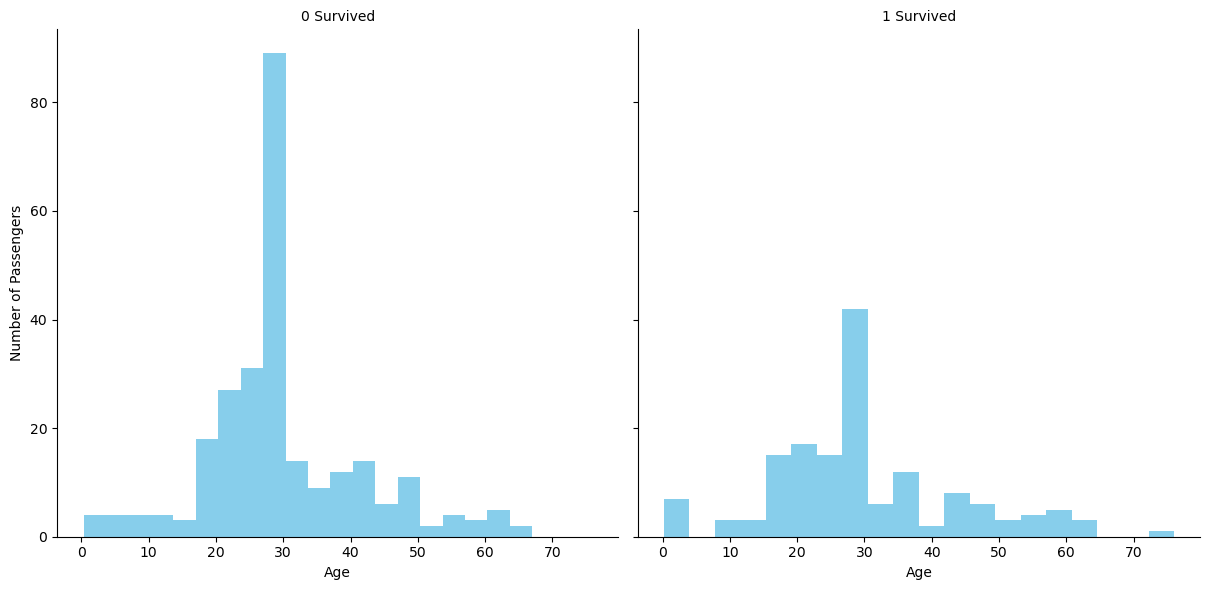

In [136]:
sns.FacetGrid(df, col='Survived', height=6).map(plt.hist, 'Age', bins=20, color='skyblue').set_axis_labels('Age', 'Number of Passengers').set_titles(col_template="{col_name} Survived")
plt.show()

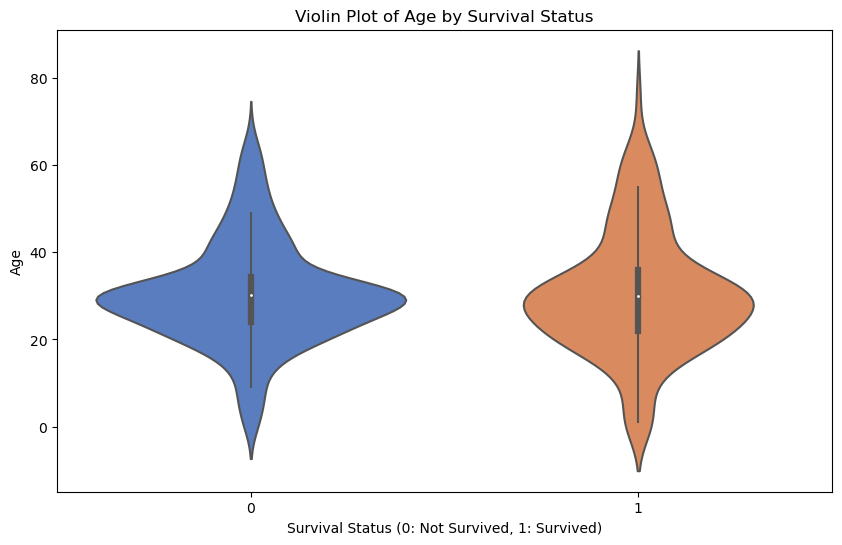

In [137]:

# Violin plot for 'Age' and 'Survived'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, palette='muted')
plt.title('Violin Plot of Age by Survival Status')
plt.xlabel('Survival Status (0: Not Survived, 1: Survived)')
plt.ylabel('Age')
plt.show()

* Missing Data
From the entry totals above, there appears to be missing data. A heatmap will help better visualize what features as missing the most information.

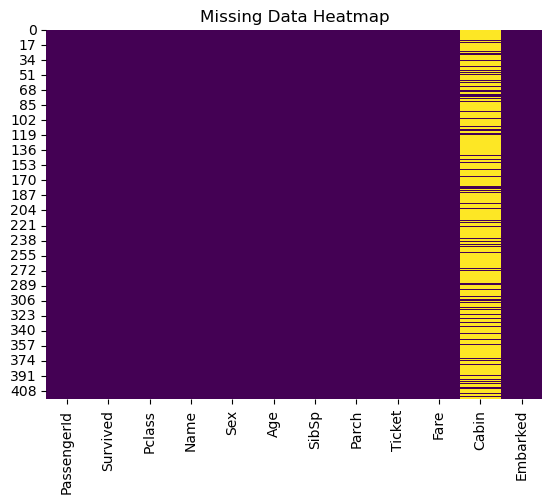

In [138]:
# Visualization 5: Heatmap for Missing Data
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [139]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age



* The Cabin column has too many missing values to do anything useful with, so it would be best to remove it from the data frame altogether.

In [140]:
# Remove Cabin feature
df.drop('Cabin', axis = 1, inplace = True)

* Name and Ticket can be removed from the dataset as these features do not provide additional information about a passenger's liklihood of survival.

* The remaining non-null objects, Sex and Embarked, will need to be specified as categories for better analysis results downstream.

In [141]:
# Remove unnecessary columns
df.drop(['Name','Ticket'], axis = 1, inplace = True)



In [142]:
# Numeric summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


* PassengerId can be removed from the dataset because it does not add any useful information in predicting a passenger's survival. The remaining variables are the correct data type.

In [143]:
# Remove PassengerId
df.drop('PassengerId', inplace = True, axis = 1)

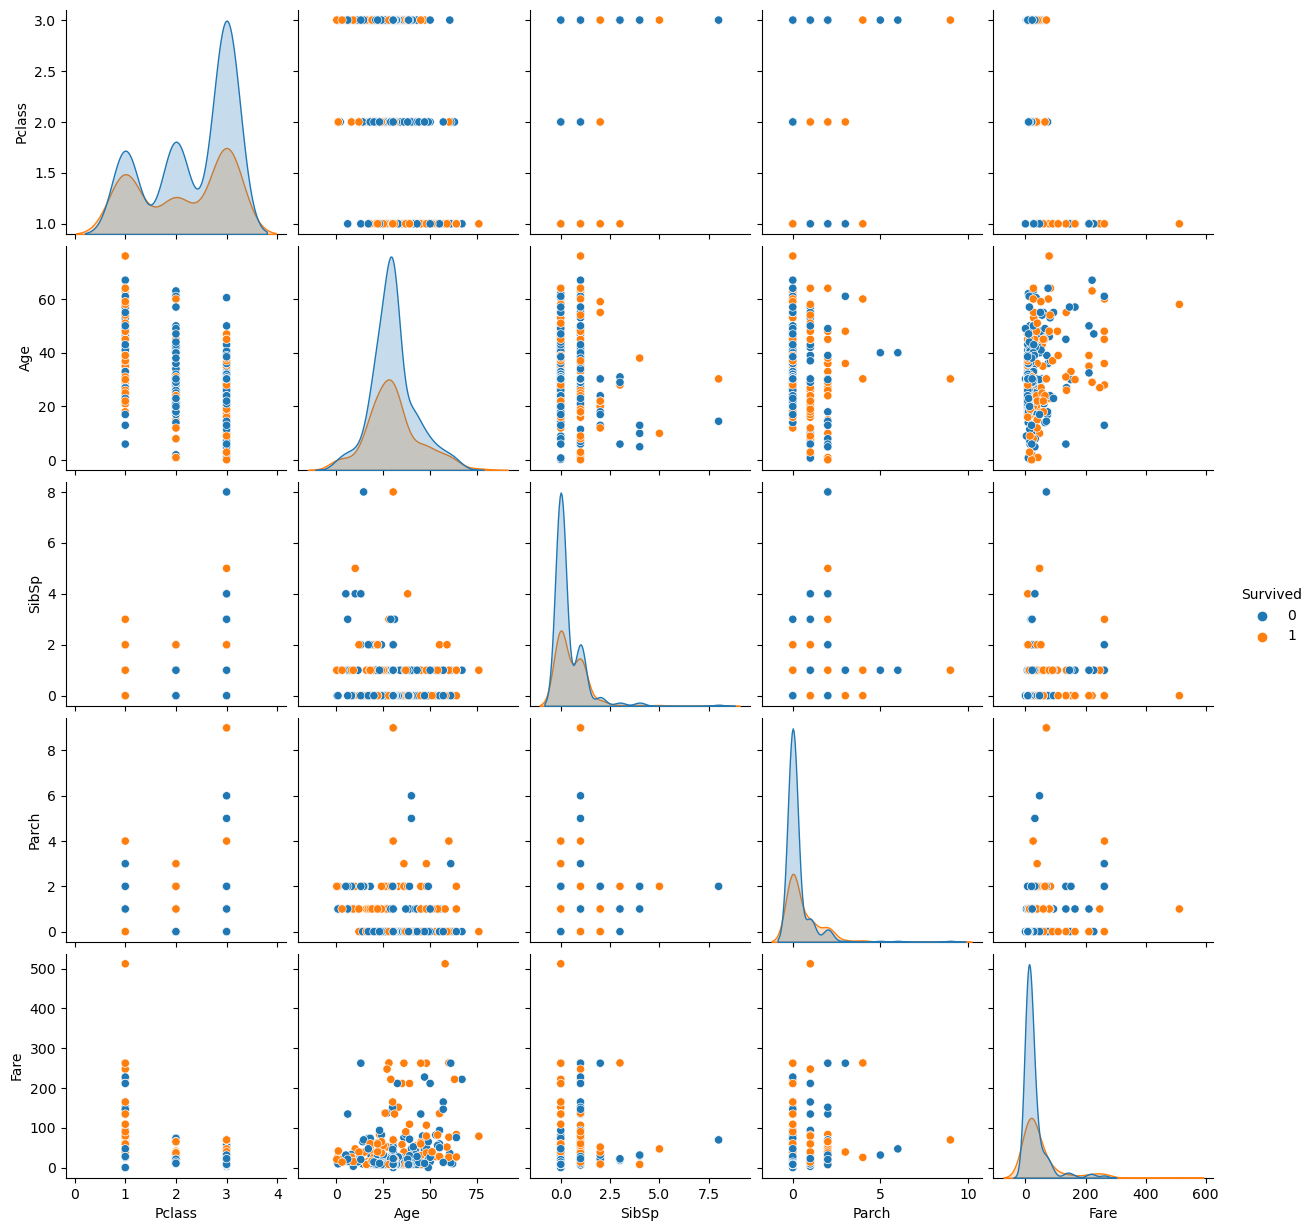

In [144]:
sns.pairplot(df, hue='Survived')

<Axes: >

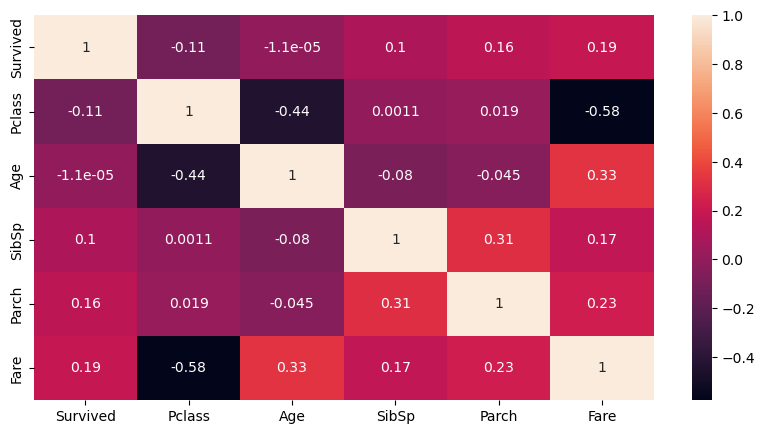

In [145]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [147]:
# Convert categorical variables into 'dummy' or indicator variables
sex = pd.get_dummies(df['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(df['Embarked'], drop_first = True)

In [148]:
# Add new dummy columns to data frame
df = pd.concat([df, sex, embarked], axis = 1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,34.5,0,0,7.8292,Q,1,1,0
1,1,3,female,47.0,1,0,7.0000,S,0,0,1
2,0,2,male,62.0,0,0,9.6875,Q,1,1,0
3,0,3,male,27.0,0,0,8.6625,S,1,0,1
4,1,3,female,22.0,1,1,12.2875,S,0,0,1


In [149]:
# Drop unecessary columns
df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('df shape',df.shape)

# Confirm changes
df.head()

df shape (418, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1


# Target Variable Splitting

* We will spilt the Full dataset into Input and target variables

* Input is also called Feature Variables Output referes to Target variables

In [150]:
# Split the data into features (X) and target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [151]:
from sklearn.linear_model import LogisticRegression

logmodel  = LogisticRegression()
logmodel.fit(X ,y) #fitting the model

LogisticRegression()

In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
print("x_train -->",X_train.shape)
print("y_train -->",y_train.shape)
print("-"*127)
print("x_test -->",X_test.shape)
print("y_test -->",y_test.shape)

x_train --> (334, 8)
y_train --> (334,)
-------------------------------------------------------------------------------------------------------------------------------
x_test --> (84, 8)
y_test --> (84,)


In [154]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
336,2,32.00000,0,0,13.0000,1,0,1
31,2,24.00000,2,0,31.5000,1,0,1
84,2,30.27259,0,0,10.7083,1,1,0
287,1,24.00000,1,0,82.2667,1,0,1
317,2,19.00000,0,0,10.5000,1,0,1
...,...,...,...,...,...,...,...,...
71,3,21.00000,0,0,7.8958,1,0,1
106,3,21.00000,0,0,7.8208,1,1,0
270,1,46.00000,0,0,75.2417,1,0,0
348,2,24.00000,0,0,13.5000,1,0,1


In [155]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
321,3,25.0,0,0,7.2292,1,0,0
324,1,39.0,0,0,211.3375,0,0,1
388,3,21.0,0,0,7.7500,1,1,0
56,3,35.0,0,0,7.8958,1,0,1
153,3,36.0,0,2,12.1833,0,0,1
...,...,...,...,...,...,...,...,...
57,3,25.0,0,0,7.6500,1,0,1
126,3,22.0,0,0,7.7958,1,0,1
24,1,48.0,1,3,262.3750,0,0,0
17,3,21.0,0,0,7.2250,1,0,0


In [156]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.50000,0,0,7.8292,1,1,0
1,1,3,47.00000,1,0,7.0000,0,0,1
2,0,2,62.00000,0,0,9.6875,1,1,0
3,0,3,27.00000,0,0,8.6625,1,0,1
4,1,3,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,30.27259,0,0,8.0500,1,0,1
414,1,1,39.00000,0,0,108.9000,0,0,0
415,0,3,38.50000,0,0,7.2500,1,0,1
416,0,3,30.27259,0,0,8.0500,1,0,1


In [157]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()



Logistic Regression


In [158]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
336,2,32.00000,0,0,13.0000,1,0,1
31,2,24.00000,2,0,31.5000,1,0,1
84,2,30.27259,0,0,10.7083,1,1,0
287,1,24.00000,1,0,82.2667,1,0,1
317,2,19.00000,0,0,10.5000,1,0,1
...,...,...,...,...,...,...,...,...
71,3,21.00000,0,0,7.8958,1,0,1
106,3,21.00000,0,0,7.8208,1,1,0
270,1,46.00000,0,0,75.2417,1,0,0
348,2,24.00000,0,0,13.5000,1,0,1


In [159]:
X_train.dropna(inplace=True)  # Remove rows with missing values

In [160]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
321,3,25.0,0,0,7.2292,1,0,0
324,1,39.0,0,0,211.3375,0,0,1
388,3,21.0,0,0,7.7500,1,1,0
56,3,35.0,0,0,7.8958,1,0,1
153,3,36.0,0,2,12.1833,0,0,1
...,...,...,...,...,...,...,...,...
57,3,25.0,0,0,7.6500,1,0,1
126,3,22.0,0,0,7.7958,1,0,1
24,1,48.0,1,3,262.3750,0,0,0
17,3,21.0,0,0,7.2250,1,0,0


In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Classifier Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Random Forest Classifier Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


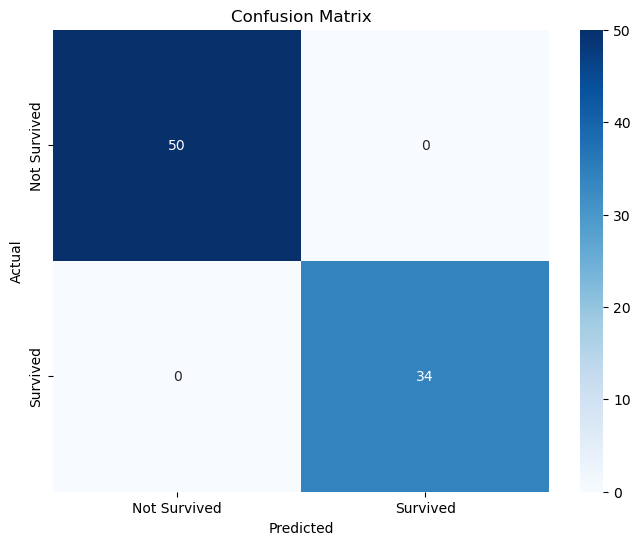

In [162]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
labels = ['Not Survived', 'Survived']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [163]:
# Initialize the k-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"KNN Classifier Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


KNN Classifier Accuracy: 0.6190476190476191
Precision: 0.5555555555555556
Recall: 0.29411764705882354
F1 Score: 0.3846153846153846


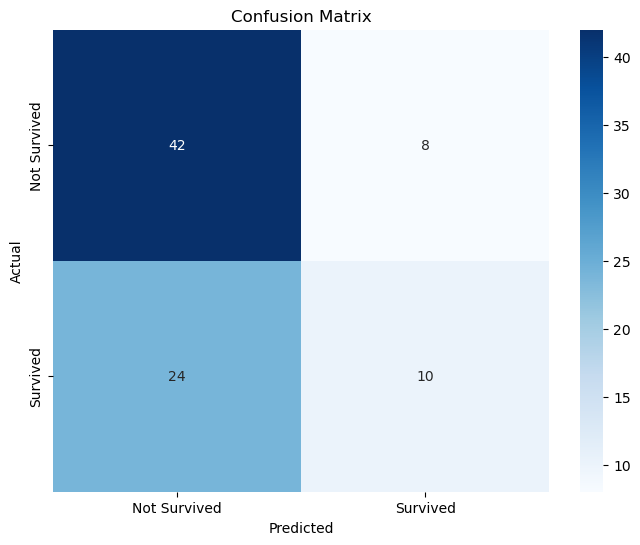

In [164]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
labels = ['Not Survived', 'Survived']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [165]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(X_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

In [167]:
# Train the model
Dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = Dtree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Dtree Classifier Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Dtree Classifier Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


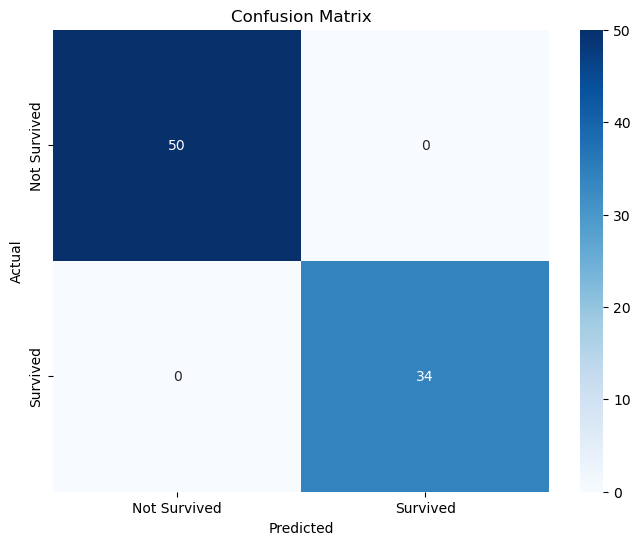

In [168]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
labels = ['Not Survived', 'Survived']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 #### Dicision tree classifier and Random forest classifier Performs well.